# Sales Analysis

In [120]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

#### There is 12 months data in seperate file so we have to merge them first.

In [53]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Sales_Data\Sales_April_2019.csv")
df.shape

(18383, 6)

In [88]:
files = [file for file in os.listdir(r'C:\Users\Dell\Downloads\Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:/Users/Dell/Downloads/Sales_Data/" + file)
    all_data = pd.concat([all_data,df])
all_data.to_csv('all_data.csv',index= False)

In [89]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data cleaning

#### Task 1 : Drop nan values

In [99]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [91]:
all_nan = all_data[all_data.isna().any(axis=1)]
all_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
all_data.dropna(inplace=True)

In [106]:
all_data['Months'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Months, dtype: int64

find 'or' and delete

In [105]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [94]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [121]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

#### Task 2 Add Months Columns

In [102]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [122]:
all_data['Months'] = all_data['Months'].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 3 Add a sales  Columns

In [123]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [124]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4 Add a city columns

In [149]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + " " + x.split(',')[2].split(' ')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Q2 What was the best month for sales? How much was earned that months?

In [141]:
results = all_data.groupby('Months').sum()
print(results)

        Quantity Ordered  Price Each       Sales
Months                                          
1                  10903  1811768.38  1822256.73
2                  13449  2188884.72  2202022.42
3                  17005  2791207.83  2807100.38
4                  20558  3367671.02  3390670.24
5                  18667  3135125.13  3152606.75
6                  15253  2562025.61  2577802.26
7                  16072  2632539.56  2647775.76
8                  13448  2230345.42  2244467.88
9                  13109  2084992.09  2097560.13
10                 22703  3715554.83  3736726.88
11                 19798  3180600.68  3199603.20
12                 28114  4588415.41  4613443.34


In [129]:
import matplotlib.pyplot as plt

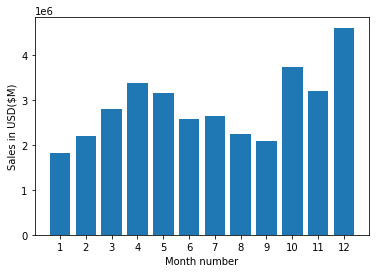

In [140]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($M)")
plt.xlabel("Month number")
plt.show()

### Q3 What city had the highest number of sales

In [150]:
city = all_data['City'].value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [153]:
city = all_data.groupby('City').sum()
city

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


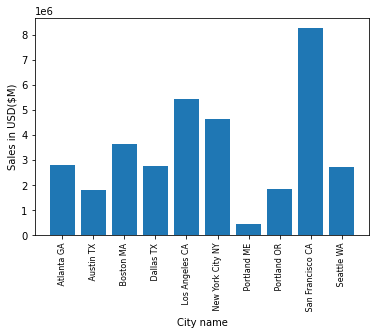

In [163]:
cities = [city for city, df in all_data.groupby('City')]
# cities = all_data['City'].unique()
plt.bar(cities,city['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("Sales in USD($M)")
plt.xlabel("City name")
plt.show()

#### Q4 what time should we display advertisment to maximize likelihood of customer's buying products?

In [166]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [169]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


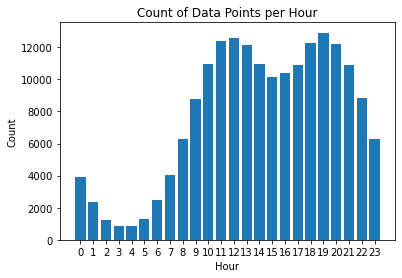

In [181]:
hourly_counts = all_data['Hour'].value_counts().sort_index()
hours = hourly_counts.index
counts = hourly_counts.values
plt.bar(hours, counts)
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Count')
plt.title('Count of Data Points per Hour')
plt.show()

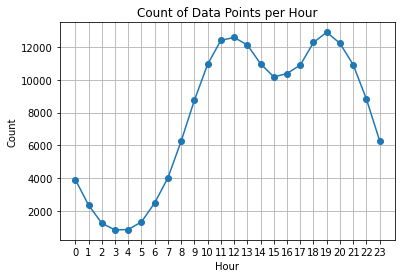

In [185]:
hourly_counts = all_data['Hour'].value_counts().sort_index()
hours = hourly_counts.index
counts = hourly_counts.values
plt.plot(hours, counts, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Data Points per Hour')
plt.grid(True)  # Add grid lines
plt.xticks(hours)  # Ensure all hours are displayed on the x-axis
plt.show()

### Q5 What products are most often sold together?

In [186]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [192]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [202]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
# print(count)

for k, v in count.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q6 What product sold the most? Why do you think it sold the most?

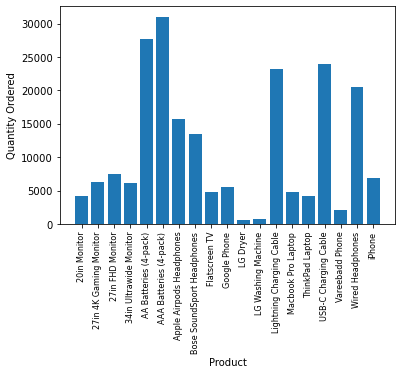

In [209]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation = 'vertical',size=8)
plt.show()

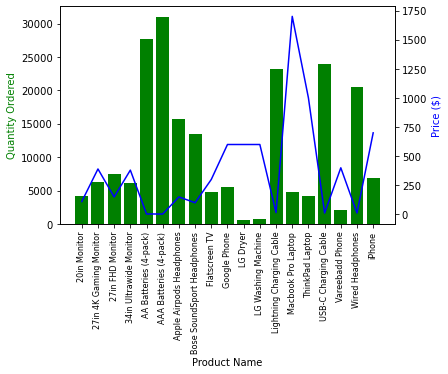

In [213]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation = 'vertical',size=8)
plt.show()